# PREVISÃO DE RENDA

# Sumário

- [Etapa 1: Entendimento do Negócio](#etapa-1-entendimento-do-negócio)
- [Etapa 2: Entendimento dos Dados](#etapa-2-entendimento-dos-dados)
- [Etapa 3: Preparação dos Dados](#etapa-3-preparação-dos-dados)
- [Etapa 4: Modelagem](#etapa-4-modelagem)
- [Etapa 5: Avaliação](#etapa-5-avaliação)
- [Etapa 6: Implantação](#etapa-6-implantação)


## Etapa 1 CRISP - DM: Entendimento do negócio<a name="etapa-1-entendimento-do-negócio"></a>

Este é um projeto que tem como objetivo prever a renda de novos clientes. A **previsão de renda** é crucial para muitas empresas que buscam reduzir riscos e tomar decisões informadas sobre seus clientes. Por isso vamos explorar diferentes técnicas de análise de dados para identificar padrões e construir modelos preditivos precisos, transformar dados brutos em insights úteis e acionáveis que ajudarão a tomar decisões com mais acertividade.


## Etapa 2 CRISP-DM: Entendimento dos dados<a name="etapa-2-entendimento-dos-dados"></a>
Os dados são informações sobre os usuários de uma entidade financeira feito como cadastro ou capatado de já clientes. São características pessoais, onde cada linha é respectiva a um cliente e as colunas são variáveis que são explicadas no dicionário abaixo. 


### Dicionário de dados:


|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|



#### Carregando os pacotes


In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

import graphviz

import pickle

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_squared_error

%matplotlib inline

#### Carregando os dados


In [2]:
# Gerando e observando o DataFrame
df = pd.read_csv('./input/previsao_de_renda.csv')
df.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição e características de todas as variáveis. 

In [3]:
# Usando o pandas_profiling para gerar um html com informações e estatísticas gerais de cada variável
prof = ProfileReport(df, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Salvando como um arquivo html para melhor visualização
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Uma opção mais resumida para informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

>#### Vemos que o DataFrame possui 15 colunas e 15000 linhas com variáveis numéricas e categóricas, 2573 (17.2%) de dados faltantes na variável "tempo_emprego". Através do html gerado pelo pandas_profiling nota-se que existem dados repetidos na variável id_cliente, porém a linha não está duplicada e sim apenas alguns dados na própria coluna, o que não afeta na nossa situação problema.


### Entendimento dos dados - Bivariadas




#### Matriz de correlação:

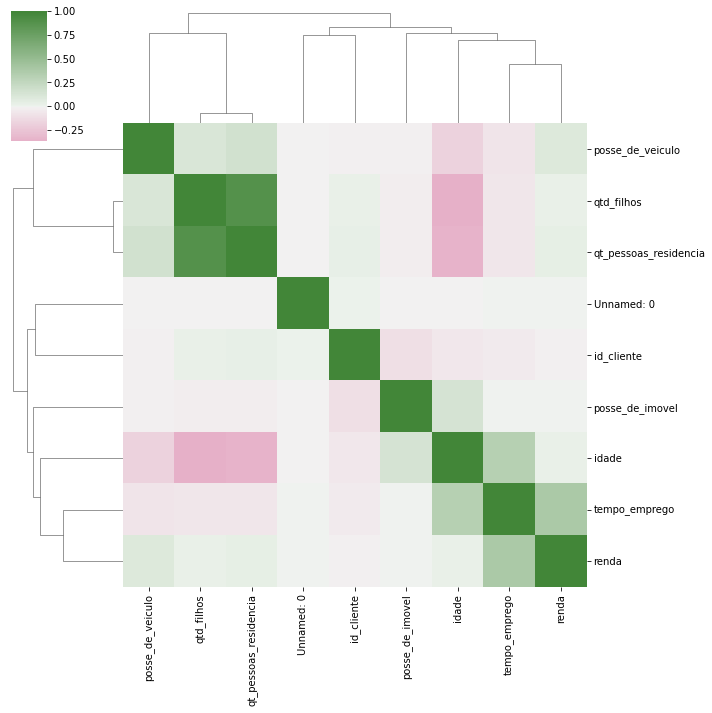

In [9]:
# Observando melhor a matriz de correlação
sns.clustermap(
    data=df.corr(),
    figsize=(10, 10),
    center=0,
    cmap=sns.diverging_palette(h_neg=350, h_pos=125, as_cmap=True, sep=1, center='light')
)

>#### Nota-se um correlação positiva forte entre a variável resposta 'renda' com a variável 'tempo_emprego' e uma correlação levemente positiva entre renda e a variável 'posse_veículo'

#### Gráficos de dispersão:

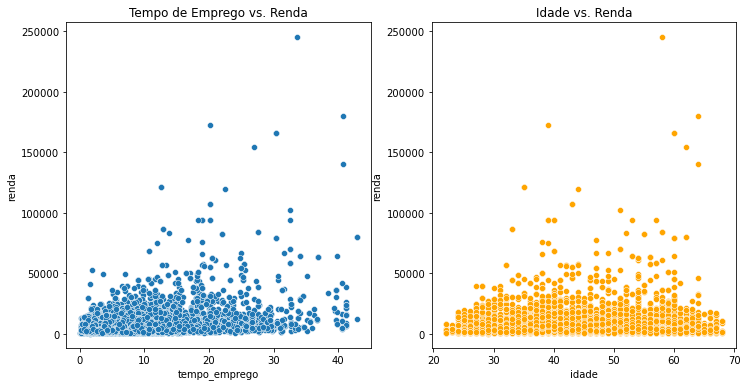

In [10]:
# criar figura com 2 subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# scatterplot de tempo_emprego vs. renda
sns.scatterplot(x="tempo_emprego", y="renda", data=df, ax=axs[0])
axs[0].set_title("Tempo de Emprego vs. Renda")

# scatterplot de idade vs. renda
sns.scatterplot(x="idade", y="renda", data=df, ax=axs[1],color="orange")
axs[1].set_title("Idade vs. Renda")

plt.show()


>#### Observa-se outliers nas variáveis 'tempo_emprego' e 'idade' em relação a renda

#### Variáveis categóricas em relação a renda ao longo do tempo:

In [11]:
#transformando a variável 'data_ref' em formato de tempo
df["data_ref"] = pd.to_datetime(df["data_ref"])

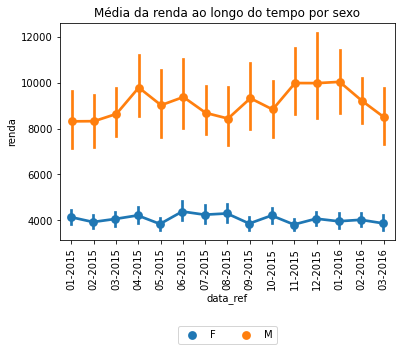

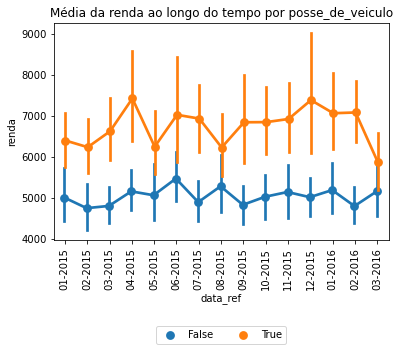

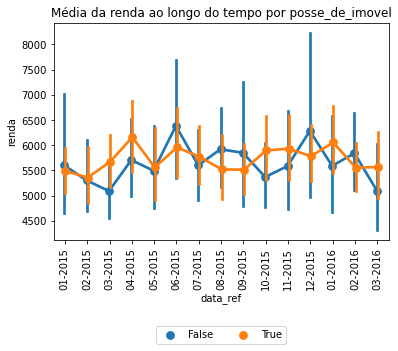

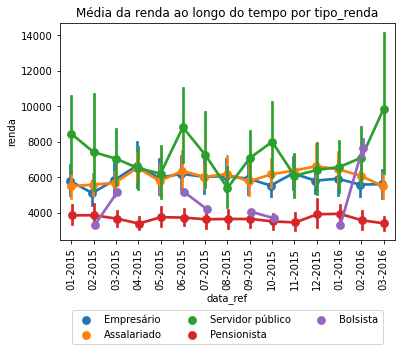

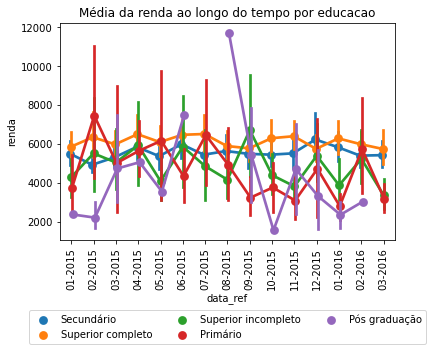

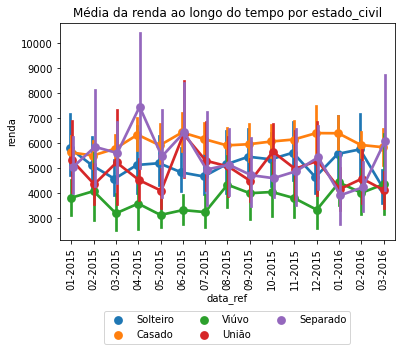

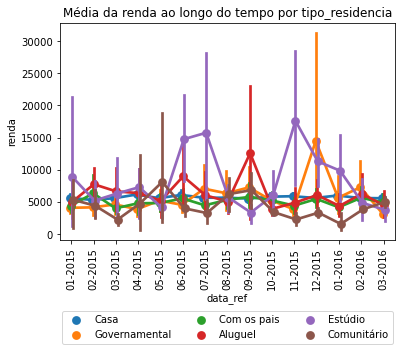

In [12]:
# Transformando a variável 'data_ref' em mes/ano para legenda
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# Lista com as variáveis para plotagem
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Loop para plotagem das figuras
for var in variaveis:
    sns.pointplot(x="data_ref", y="renda", hue=var, data=df, dodge=True, ci=95)
    plt.xticks(list(range(df['data_ref'].nunique())), tick_labs, rotation=90)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)
    plt.title(f'Média da renda ao longo do tempo por {var}')
    plt.subplots_adjust(hspace=0.7)
    plt.show()

>#### As variáveis qualitativas não binárias demonstraram algumas distribuições anormais ao longo do tempo, com possivel outliers e com uma alta variação em algumas categorias, o que vale ressaltar o tratamento para aplicação no modelo. 


## Etapa 3 Crisp-DM: Preparação dos dados<a name="etapa-3-preparação-dos-dados"></a>
Nessa etapa realizaremo as transformações nos dados para análise e modelo


#### Selecionando e tratando dados:


Como observado na análise exploratória dos dados, a variável **'tempo_emprego'** possui dados faltantes e sendo uma variável numérica com uma pequena porcentagem de dados faltantes, iremos preencher com a **mediana** da coluna.

As variáveis **'Unnamed: 0'**, **'id_cliente'** e **'data_ref'** não tem valor para nosso problema, então vamos filtrar e tratar o data frame para melhor funcionalidade. 

In [13]:
#Retirando as variáveis e preenchendo dados faltantes com a mediana
df = df.drop(['Unnamed: 0', 'id_cliente', 'data_ref'], axis=1)\
       .fillna({'tempo_emprego': df['tempo_emprego'].median()})


#### Construção e Formatação dos dados:

Já pensando na construção do modelo, iremos preparar os dados **retirando outliers** e transformando em **dummies** variáveis categóricas.

>Usando o **logaritmo** da variável renda, é possivel notar uma distribuição mais normal dos dados:

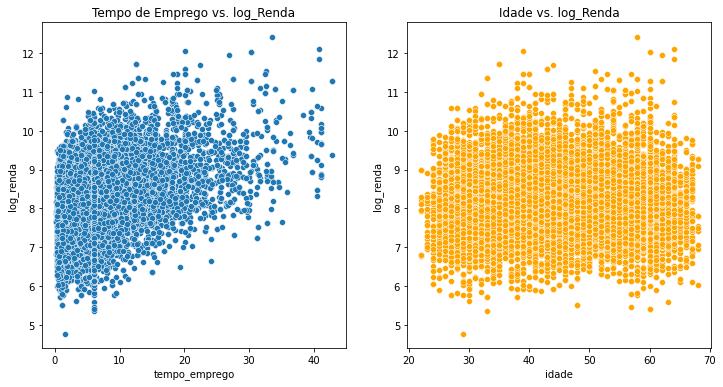

In [14]:
# Criando uma variável do logarítimo de renda
df['log_renda'] = np.log(df['renda'])

# criar figura com 2 subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# scatterplot de tempo_emprego vs. log_renda
sns.scatterplot(x="tempo_emprego", y="log_renda", data=df, ax=axs[0])
axs[0].set_title("Tempo de Emprego vs. log_Renda")

# scatterplot de idade vs. log_renda
sns.scatterplot(x="idade", y="log_renda", data=df, ax=axs[1],color="orange")
axs[1].set_title("Idade vs. log_Renda")

plt.show()

>Removendo algumas categorias das variáveis categóricas, que não paresentavam um comportamento normal ao longo do tempo e transformando em **dummies** já visando o aproveitamento nos modelos.

In [36]:
# lista das categorias a serem removidas
categorias_remover = ['Bolsista', 'Pós graduação', 'Estúdio']

# removendo categorias das variáveis correspondentes
df['tipo_renda'] = df['tipo_renda'].apply(lambda x: x if x not in categorias_remover else 'Outros')
df['educacao'] = df['educacao'].apply(lambda x: x if x not in categorias_remover else 'Outros')
df['tipo_residencia'] = df['tipo_residencia'].apply(lambda x: x if x not in categorias_remover else 'Outros')

# convertendo variáveis categóricas em dummies, retirando as cat com outliers, renomeando colunas e transformando bool em int 
df_dummies = (
    pd.get_dummies(df)
    .drop(['tipo_renda_Outros', 'educacao_Outros', 'tipo_residencia_Outros'], axis=1)
    .astype({col: int for col in df.select_dtypes(include='bool').columns})
)

# renomeando colunas para o formato aceito pelo modelo
df_dummies.rename(columns={'educacao_Superior completo': 'educacao_Superior_completo','tipo_renda_Servidor público':'tipo_renda_Servidor_público'}, inplace=True)


## Etapa 4 Crisp-DM: Modelagem<a name="etapa-4-modelagem"></a>
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Como o problema se trata de uma variável resposta contínua 'renda' a técnica de modelagem a ser utilizada é a técnica de **regressão** e para isso vamos testar tanto o método da **árvore de regressão**, quanto a **regressão linear**.


### Regressão Linear


#### Preparação para Regressão:

In [16]:
# Separando a base de dados em treino e teste
train_data, test_data = train_test_split(df_dummies,random_state=777)

In [17]:
# y e X treino
y_train = train_data["log_renda"]
X_train = train_data.drop(["renda", "log_renda"], axis=1)

# y e X teste
y_test = test_data["log_renda"]
X_test = test_data.drop(["renda", "log_renda"], axis=1)

#### Seleção de variáveis STEPWISE:

Para evitar overfitting e ter uma ideia de quais variáveis são interessantes de utilizar no modelo, iremos utilizar a técnica de seleção **STEPWISE** que testa vários modelos de combinações diferentes das variáveis independentes em relação a variável resposta. E através dos **p-values** e o **AIC** do modelo encontraremos o mais útil.

In [18]:
#Definindo a função de seleção stepwise com o p-value < 0.05 e buscando o melhor AIC

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value and AIC from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    prev_aic = float('inf')
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_aic = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_aic[new_column] = model.aic
        best_aic = new_aic.min()
        if best_aic < prev_aic:
            best_feature = new_aic.idxmin()
            included.append(best_feature)
            prev_aic = best_aic
            changed = True
            if verbose:
                print('Add  {:30} with AIC {:.6}'.format(best_feature, best_aic))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            prev_aic = model.aic
            changed = True
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [19]:
# Chamando a função stepwise_selection

result= stepwise_selection(X_train, y_train)

print('Seleção stepwise finalizada:')
print(result)

Add  tempo_emprego                  with AIC 27247.2
Add  sexo_F                         with AIC 24648.8
Add  educacao_Superior_completo     with AIC 24566.5
Add  tipo_renda_Empresário          with AIC 24499.1
Add  posse_de_imovel                with AIC 24458.5
Add  idade                          with AIC 24443.3
Add  tipo_renda_Pensionista         with AIC 24428.3
Add  qtd_filhos                     with AIC 24421.4
Add  posse_de_veiculo               with AIC 24415.7
Add  tipo_renda_Assalariado         with AIC 24412.8
Add  estado_civil_Separado          with AIC 24411.6
Drop estado_civil_Separado          with p-value 0.0731483
Seleção stepwise finalizada:
['tempo_emprego', 'sexo_F', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'posse_de_imovel', 'idade', 'tipo_renda_Pensionista', 'qtd_filhos', 'posse_de_veiculo', 'tipo_renda_Assalariado']


In [20]:
#Treinando modelos para avaliar seus parâmetros
modelo_log = 'log_renda ~ tempo_emprego + sexo_F + educacao_Superior_completo + tipo_renda_Empresário + posse_de_imovel + idade + tipo_renda_Pensionista + posse_de_veiculo + tipo_renda_Assalariado + tipo_renda_Servidor_público + qt_pessoas_residencia'
md_stp = smf.ols(modelo_log, data = train_data).fit()
md_stp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     530.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:07:43   Log-Likelihood:                -12196.
No. Observations:               11250   AIC:                         2.442e+04
Df Residuals:                   11238   BIC:                         2.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.1052      0.276     29.397      0.000       7.565       8.646
tempo_emprego                   0.0611      0.001     51.526      0.000       0.059       0.063
sexo_F                         -0.7894      0.016    -49.891      0.000      -0.820      -0.758
educacao_Superior_completo      0.1204      0.014      8.393      0.000       0.092       0.149
tipo_renda_Empresário          -0.0914      0.271     -0.337      0.736      -0.623       0.440
posse_de_imovel                 0.0856      0.015      5.859      0.000       0.057       0.114
idade                           0.0054      0.001      6.366      0.000       0.004       0.007
tipo_renda_Pensionista         -0.3264      0.271     -1.202      0.229      -0.859       0.206
posse_de_veiculo                0.0403      0.015      2.687      0.007       0.011       0.070
tipo_renda_Assalariado         -0.2366      0.271     -0.873      0.383      -0.768       0.295
tipo_renda_Servidor_público    -0.1819      0.272     -0.669      0.503      -0.715       0.351
qt_pessoas_residencia           0.0194      0.008      2.402      0.016       0.004       0.035
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.357
Skew:                           0.009   Prob(JB):                        0.507
Kurtosis:                       3.051   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>#### Obtendo o R² na base de testes (É importante lembrar que como usamos log_renda, é preciso fazer a operação inversa antes de calcular o R² real)

In [21]:
 
# Obtém as previsões em escala original do modelo treinado na base de testes
y_pred_test = np.exp(md_stp.predict(X_test)) - 1

# Obtém o R² na base de testes
r2_test = r2_score( np.exp(y_test) - 1, y_pred_test)

r2_test

0.2816770531066991

#### Regularização Ridge ou Lasso:


Afim de diminuir o overfitting, multicolinearidade e otimizar o modelo vamos realizar a regularização.

In [22]:
# Criando um modelo de regressão linear para cada tipo de alpha 

alphas = [0,0.005, 0.05, 0.1, 0.5, 1]

# Lista para armazenar o R² na base de teste para cada modelo ajustado
test_ridge_r2 = []

# Loop sobre os valores alpha
for alpha in alphas:
    # Defina o modelo
    modelo_ridge = modelo_log
    md_ridge = smf.ols(modelo_ridge, data=train_data)
    
    # Regularização em ridge 
    reg_ridge = md_ridge.fit_regularized(method='elastic_net', refit=True, L1_wt=1.0, alpha=alpha)

    # Calculando o R² na base de teste
    pred_ridge = reg_ridge.predict(test_data)
    r2_ridge = r2_score(y_test, pred_ridge)
    test_ridge_r2.append(r2_ridge)
       
  
 # Os valores de R² na base de teste
print("Valores de R² na base de teste para cada modelo:")
for alpha, r2 in zip(alphas, test_ridge_r2):
    print(f"Alpha={alpha}: R²={r2}")    

Valores de R² na base de teste para cada modelo:
Alpha=0: R²=0.363748578283687
Alpha=0.005: R²=0.3628507839517361
Alpha=0.05: R²=0.3479708215224646
Alpha=0.1: R²=0.3479708215224646
Alpha=0.5: R²=0.17696803654337678
Alpha=1: R²=-4.896107527772501


In [23]:
# Treinando o melhor modelo da regularização
md_lasso = smf.ols(modelo_log, data = train_data )
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1.0
                         , alpha = 0.005)

reg_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     647.1
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:07:44   Log-Likelihood:                -12202.
No. Observations:               11250   AIC:                         2.442e+04
Df Residuals:                   11241   BIC:                         2.450e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.9371      0.036    219.717      0.000       7.866       8.008
tempo_emprego                   0.0615      0.001     52.220      0.000       0.059       0.064
sexo_F                         -0.7903      0.016    -50.072      0.000      -0.821      -0.759
educacao_Superior_completo      0.1233      0.014      8.634      0.000       0.095       0.151
tipo_renda_Empresário           0.1350      0.017      8.128      0.000       0.102       0.168
posse_de_imovel                 0.0865      0.015      5.925      0.000       0.058       0.115
idade                           0.0049      0.001      5.957      0.000       0.003       0.007
tipo_renda_Pensionista         -0.0986      0.024     -4.037      0.000      -0.146      -0.051
posse_de_veiculo                0.0434      0.015      2.905      0.004       0.014       0.073
tipo_renda_Assalariado               0          0        nan        nan           0           0
tipo_renda_Servidor_público          0          0        nan        nan           0           0
qt_pessoas_residencia                0          0        nan        nan           0           0
==============================================================================
Omnibus:                        1.440   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.421
Skew:                           0.010   Prob(JB):                        0.491
Kurtosis:                       3.051   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Obtém as previsões em escala original do modelo treinado na base de testes
y_pred_test_lasso = np.exp(reg_lasso.predict(X_test)) - 1

# Obtém o R² na base de testes
r2_test_lasso = r2_score( np.exp(y_test) - 1, y_pred_test_lasso)

r2_test_lasso

0.2825390486562557

#### Observando os resíduos do modelo:

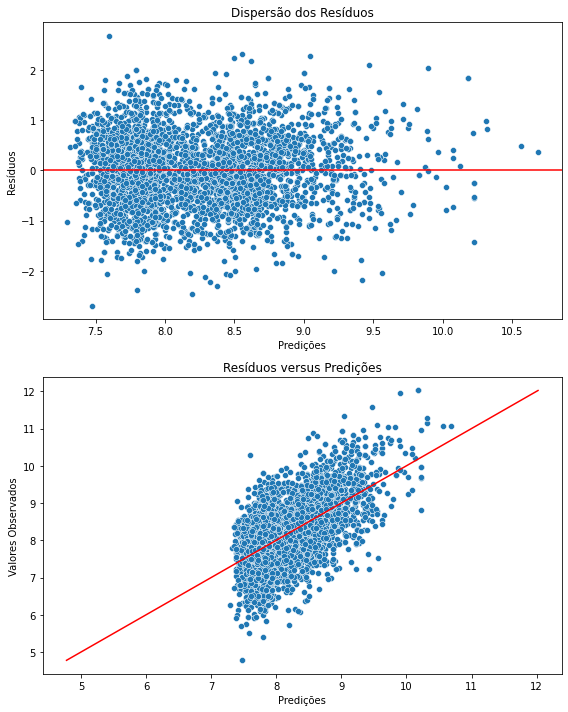

In [25]:
# Obtém as predições do modelo para a base de teste
y_pred = reg_lasso.predict(X_test)

# Calcula os resíduos
residuos = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 10))

sns.scatterplot(x=y_pred, y=residuos, ax=ax1)
ax1.axhline(y=0, color='r', linestyle='-')
ax1.set_xlabel('Predições')
ax1.set_ylabel('Resíduos')
ax1.set_title('Dispersão dos Resíduos')

# Cria o plot dos resíduos versus as predições
sns.scatterplot(x=y_pred, y=y_test, ax=ax2)
sns.lineplot(x=y_test, y=y_test, color='r', ax=ax2)
ax2.set_xlabel('Predições')
ax2.set_ylabel('Valores Observados')
ax2.set_title('Resíduos versus Predições')

plt.tight_layout()
plt.show()

>#### Vemos que a distribuição segue o formato normal e menos padronizada, os valores preditos se aproximam do formato.

### Árvore de Regressão

Como vemos que algumas variáveis independentes não possuem uma grande relação linear com a variável resposta, é válido testarmos também um modelo de **árvore de regressão**, onde avalia-se menos a linearidade e leva em consideração também a relação entre as variáveis independentes. E assim decidir qual o modelo mais útil.

In [26]:
# y e X treino para árvore
y_train_tree = train_data["renda"]
X_train_tree = train_data.drop(["renda", "log_renda"], axis=1)

# y e X teste para árvore
y_test_tree = test_data["renda"]
X_test_tree = test_data.drop(["renda", "log_renda"], axis=1)

In [27]:
#Instanciando a árvore de regressão
tree_reg = DecisionTreeRegressor(random_state = 123)

#### Buscando melhores parâmetros:

Buscando os melhores parâmetros para evitar o overfiting e melhorar a generalização do modelo, fazendo a **pós poda** e **pré poda** e buscando o melhor **ccp_alpha**

In [28]:
# Definir os hiperparâmetros para o GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': np.linspace(0.001, 0.010, num=10)
}

# Criar uma instância do GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Treinar o modelo com o conjunto de treinamento
grid_search.fit(X_train_tree, y_train_tree)

# Obter os melhores hiperparâmetros encontrados pelo GridSearchCV
best_params = grid_search.best_params_

# Criar uma nova instância do modelo de árvore de regressão com os melhores hiperparâmetros
best_tree_reg = DecisionTreeRegressor(**best_params, random_state=123)

# Treinar o modelo com o conjunto de treinamento
best_tree_reg.fit(X_train_tree, y_train_tree)

# Fazer previsões no conjunto de teste
y_pred_tree = best_tree_reg.predict(X_test_tree)

best_tree_reg.get_params()

{'ccp_alpha': 0.001,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

>Depois de pegar um modelo base do GridSearch, fiz pequenas alterações que levasse a um modelo com melhor **eficiência** porém sem atingir o **overfitting**

In [29]:
#Instanciar o modelo final
tree_reg = DecisionTreeRegressor(max_depth = 5,min_samples_leaf = 2,ccp_alpha = 0.005, min_samples_split = 2,random_state = 123)
# Treinar o modelo com o conjunto de treinamento
tree_reg.fit(X_train_tree, y_train_tree)

# Fazer previsões no conjunto de teste
y_pred_tree = tree_reg.predict(X_test_tree)
tree_reg_r2 = r2_score(y_test_tree, y_pred_tree)
tree_reg_r2

0.4166849717034864

In [35]:
# Visualizando a árvore escolhida e salvando a imagem
dot_data = tree.export_graphviz(tree_reg, out_file=None, 
                                feature_names=X_train.columns,
                                filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("tree_reg", view=True)


'tree_reg.png'

## Etapa 5 Crisp-DM: Avaliação dos resultados<a name="etapa-5-avaliação"></a>


### Avaliação dos modelos:

Depois de criado os modelos e feito os tratamentos contra overfiting e melhorar a generalização vamos utilizar o **R²** que indica a proporção da variabilidade da variável dependente com as variáveis explicativas, para ajudar a decidir qual melhor modelo. Vale lembrar que não é só essa métrica que deve se levar em consideração, porém é um aliado importante para tomar a decisão.

In [ ]:
# Calculate R² da melhor árvore de regressão
r2_reg_lin = r2_score(y_test_tree, y_pred_tree)

# Comparando os R² de ambos métodos
print("R² for linear regression: {:.3f}".format(r2_test_lasso))
print("R² for decision tree regression: {:.3f}".format(r2_reg_lin))


>Como vimos que a correlação entre a variável resposta "Renda" com a maioria das variáveis explicativas é fraca e não contém muita linearidade, a escolha pelo modelo de **Árvore de Regressão** se mostrou mais útil para nosso problema, o que ficou explícito na comparação dos R². 

## Etapa 6 Crisp-DM: Implantação<a name="etapa-6-implantação"></a>


>A implantação do projeto vai ocorrer em forma de aplicação utilizando o framework **STREAMLIT**, o script que vai estar no repositório no git hub

In [ ]:
#Salvando o modelo escolhido para ser utilizado no script
with open('tree_reg.pkl', 'wb') as file:
    pickle.dump(tree_reg, file)